<a href="https://colab.research.google.com/github/anushriiyer/DSAIMiniProject/blob/main/Mini_Project_2_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [ ]:
%cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/NSDUH_2020_Tab.csv', low_memory=False)
data = data.drop(32893)
data.drop("FILEDATE", axis = 1, inplace = True)
#removal of extra row at the end of file
data

,QUESTID2,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,CG30EST,...,GOVTPROG,INCOME,POVERTY3,PDEN10,COUTYP4,MAIIN102,AIIND102,ANALWTQ1Q4_C,VESTRQ1Q4_C,VEREP
0,10000182.0,1.0,99.0,99.0,16.0,9999.0,99.0,1.0,30.0,99.0,...,2.0,4.0,3.0,3.0,3.0,2.0,2.0,16186.579070,40048.0,2.0
1,10001831.0,1.0,99.0,99.0,8.0,9999.0,99.0,1.0,24.0,99.0,...,2.0,3.0,3.0,2.0,2.0,2.0,2.0,16809.072850,40022.0,2.0
2,10002722.0,2.0,99.0,99.0,991.0,9991.0,91.0,91.0,91.0,91.0,...,2.0,2.0,3.0,1.0,1.0,2.0,2.0,1379.866862,40011.0,1.0
3,10002897.0,2.0,99.0,99.0,991.0,9991.0,91.0,91.0,91.0,91.0,...,2.0,4.0,3.0,1.0,1.0,2.0,2.0,422.776340,40007.0,1.0
4,10004677.0,2.0,4.0,4.0,991.0,9991.0,91.0,91.0,91.0,91.0,...,2.0,4.0,3.0,2.0,2.0,2.0,2.0,609.829709,40031.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32888,43070618.0,2.0,99.0,99.0,991.0,9991.0,91.0,91.0,91.0,91.0,...,2.0,4.0,3.0,2.0,2.0,2.0,2.0,968.966425,40039.0,1.0
32889,43071867.0,2.0,99.0,99.0,991.0,9991.0,91.0,91.0,91.0,91.0,...,2.0,4.0,3.0,1.0,1.0,2.0,2.0,329.312176,40010.0,1.0
32890,43074600.0,2.0,4.0,4.0,991.0,9991.0,91.0,91.0,91.0,91.0,...,2.0,3.0,3.0,2.0,2.0,2.0,2.0,148.718934,40043.0,1.0
32891,43074630.0,2.0,99.0,99.0,991.0,9991.0,91.0,91.0,91.0,91.0,...,2.0,4.0,3.0,2.0,2.0,2.0,2.0,982.305736,40022.0,1.0


In [ ]:
conditions = [
    (data['ABUSEPYHAL'] == 1),
    (data['ABUSEPYSED'] == 1),
    (data['ABUSEPYSTM'] == 1),
    (data['ABUSEPYPNR']== 1),
    (data['ABUSEALC'] == 1),
    (data['ABUSEHER'] == 1),
    (data['ABUSECOC'] == 1),
    (data['ABUSEMRJ'] == 1),
    (data['ABUSEPYHAL'] == 0) & (data['ABUSEPYSED'] == 0) & (data['ABUSEPYSTM'] == 0) & (data['ABUSEPYPNR']== 0) & (data['ABUSEALC'] == 0) & 
    (data['ABUSEHER'] == 0) & (data['ABUSECOC'] == 0) & (data['ABUSEMRJ'] == 0),]

# create a list of the values we want to assign for each condition
values = ['Hallucinogen', 'Sedatives', 'Stimulants', 'Pain Relievers', 'Alcohol', 'Heroin', 'Cocaine', 'Marijuana', 'None']

# create a new column and use np.select to assign values to it using our lists as arguments
data['TYPE'] = np.select(conditions, values)

data['TYPE']

0        None
1        None
2        None
3        None
4        None
         ... 
32888    None
32889    None
32890    None
32891    None
32892    None
Name: TYPE, Length: 32893, dtype: object

In [ ]:
data1 = pd.DataFrame(data[['K6SCYR','POVERTY3', 'CATAG7','INCOME','TYPE']])
data1.drop(data1[data1['K6SCYR'] == 'NaN'].index, inplace = True)
#data2 = data2[np.all(np.isfinite(data2), axis=1)] 
data1 = data1.dropna(subset = ['K6SCYR','POVERTY3', 'CATAG7','INCOME'])

data1.drop(data1[data1['TYPE'] == 'None'].index, inplace = True)

## **SIMPLE DECISION TREE**



1. Binary Classification Decision Tree (Predicting drug abuse through variables)

In [ ]:
data2 = pd.DataFrame(data[['K6SCYR','POVERTY3', 'CATAG7','INCOME','ILLYR']])
data2.drop(data2[data2['K6SCYR'] == 'NaN'].index, inplace = True)
#data2 = data2[np.all(np.isfinite(data2), axis=1)] 
data2 = data2.dropna(subset = ['K6SCYR','POVERTY3', 'CATAG7','INCOME','ILLYR'])


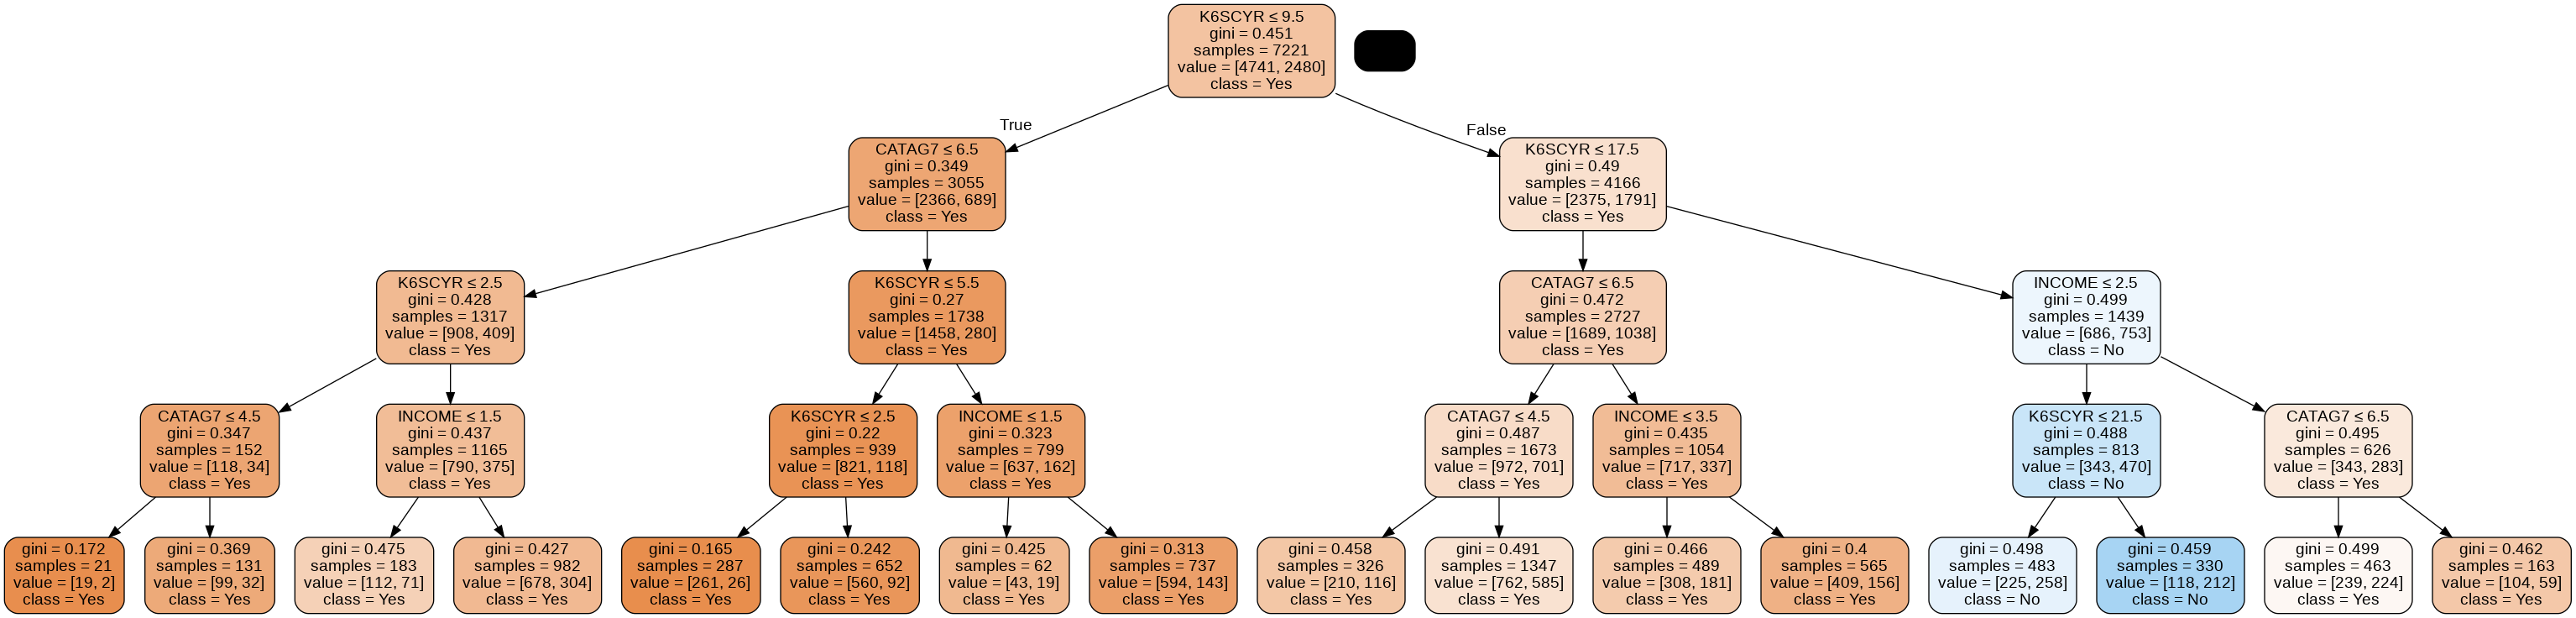

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(data2.drop('ILLYR',axis = 1), data2['ILLYR'], test_size = 0.25)

dectree = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=4, min_samples_leaf=3)
dectree.fit(X_train, y_train)


import io
from io import StringIO
from sklearn.tree import export_graphviz

from IPython.display import Image  
import pydotplus
import graphviz
xvar = data2.drop('ILLYR', axis=1)
feature_cols = xvar.columns
dot_data = StringIO()
export_graphviz(dectree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Yes','No'])

from pydot import graph_from_dot_data
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [ ]:
dectree.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_cols, dectree.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'FeatureImportance'}, inplace = True)
feat_imp.sort_values(by=['FeatureImportance'], ascending=False).head()


,FeatureImportance
K6SCYR,0.731411
CATAG7,0.197940
INCOME,0.070649
POVERTY3,0.000000


Classification Accuracy 	: 0.6741448552832018
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6557308970099668
True Positive Rate:	 0.1764004767580453
False Positive Rate:	 0.08795411089866156
True Negative Rate:	 0.9120458891013384
False Negative Rate:	 0.8235995232419547


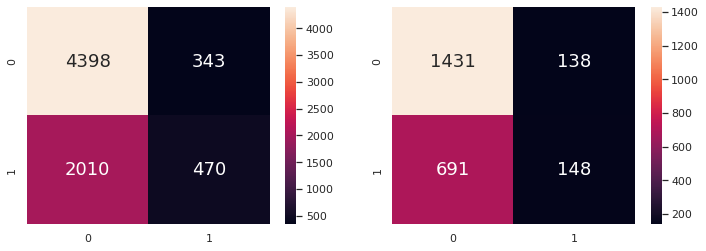

In [ ]:
dectree.fit(X_train, y_train)    # train the decision tree model

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)


# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

CM = confusion_matrix(y_test, y_test_pred) #finding true positive and false positive rates for test data
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
TNR = TN/(TN+FP)
FNR = FN/(TP+FN)


print("True Positive Rate:\t", TPR)
print("False Positive Rate:\t", FPR)
print("True Negative Rate:\t", TNR)
print("False Negative Rate:\t", FNR)


We have implemented a simple decision tree model to predict susceptibility to substance abuse utilising the variables K6SCYR (psychological distress indicator), INCOME (income), POVERTY3 (poverty level), CATAG7 (age) and NEWRACE2 (race). This model is **65.57% accurate** on the test data and considers the predicting variables vital to its predictions in the following order (from highest to lowest): **K6SCYR**, **CATAG7**, **INCOME** and **POVERTY3**. According to this model, the variable *NEWRACE2* is *not a good predictor variable*.


2. Multi-Class Classification Decision Tree (Predicting the type of substance abuse through variables)

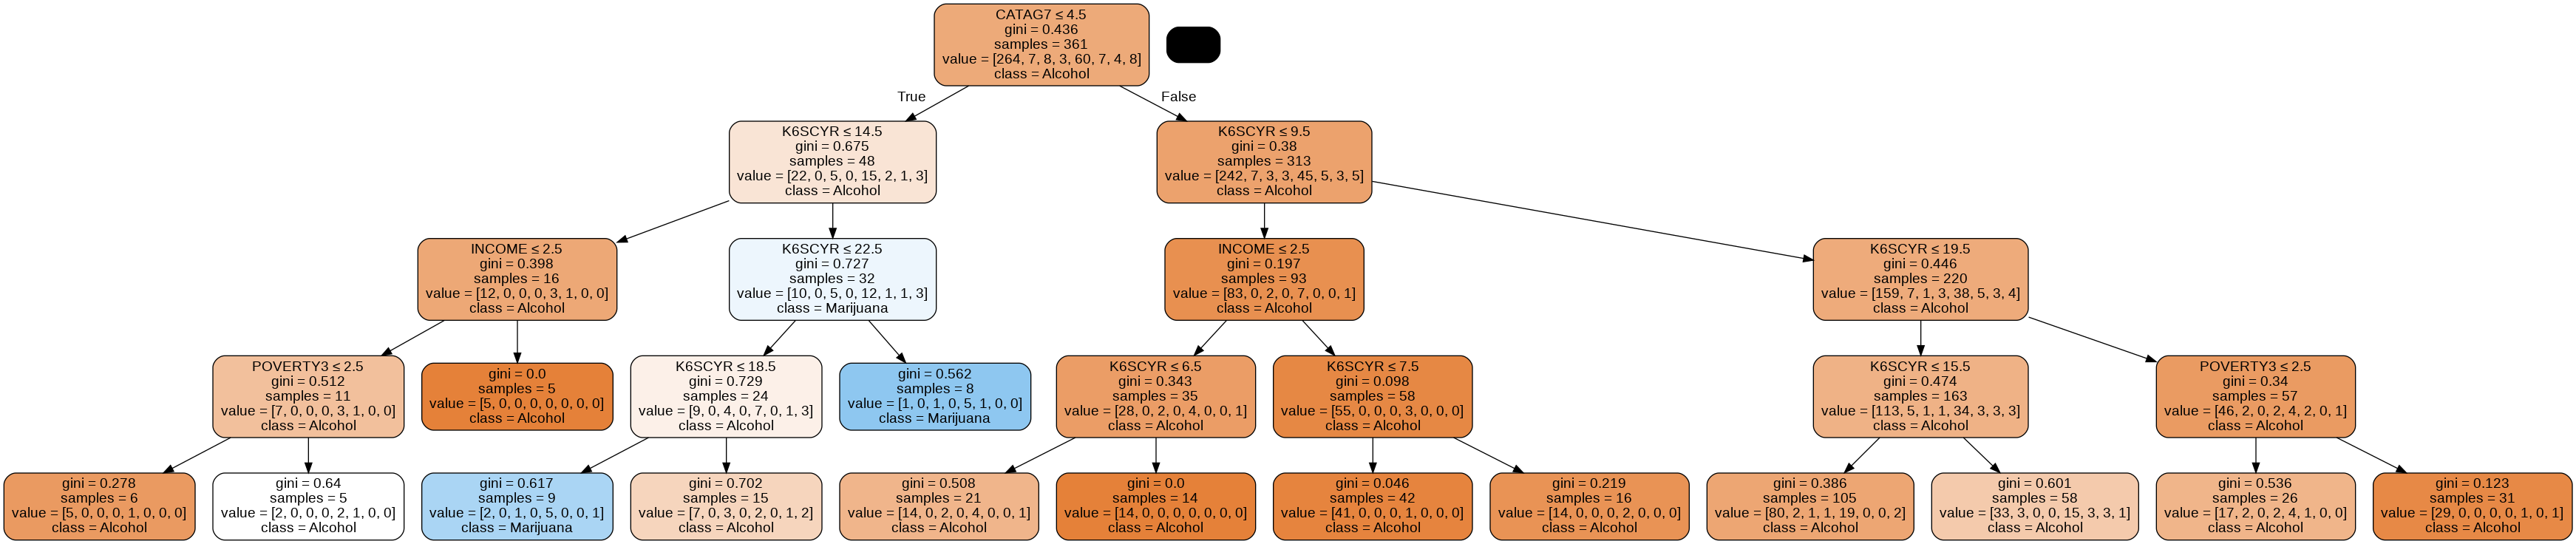

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(data1.drop('TYPE',axis = 1), data1['TYPE'], test_size = 0.25)

dectree = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=4, min_samples_leaf=5)
dectree.fit(X_train, y_train)


import io
from io import StringIO
from sklearn.tree import export_graphviz

from IPython.display import Image  
import pydotplus
import graphviz
xvar = data1.drop('TYPE', axis=1)
feature_cols = xvar.columns
dot_data = StringIO()
export_graphviz(dectree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Alcohol', 'Hallucinogens', 'Pain Relievers', 'Sedatives', 'Marijuana', 'Stimulants', 'Heroin', 'Cocaine'])

from pydot import graph_from_dot_data
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
dectree.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_cols, dectree.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'FeatureImportance'}, inplace = True)
feat_imp.sort_values(by=['FeatureImportance'], ascending=False).head()

,FeatureImportance
K6SCYR,0.573613
CATAG7,0.258084
POVERTY3,0.106630
INCOME,0.061672


In [ ]:
dectree.fit(X_train, y_train)    # train the decision tree model

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)


# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

      
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))

Classification Accuracy 	: 0.7506925207756233
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6446280991735537


We now implement the simple decision tree model to predict specific types of substance abuse. This model is **64.46% accurate** on the test data and considers the predicting variables vital to its predictions in the following order (from highest to lowest): **K6SCYR**, **CATAG7**, **POVERTY3** and **INCOME**. According to this model, the variable *NEWRACE2* is *not a good predictor variable*.

## **LOGISTIC REGRESSION**

In [ ]:
# Importing essential models and functions from sklearn
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression

In [ ]:
# Extracting necessary variables in a pandas DataFrame for the Logistic Regression section
data3 = pd.DataFrame(data[['INCOME', 'POVERTY3', 'CATAG7', 'NEWRACE2', 'K6SCYR', 'ILLYR']])
data3

,INCOME,POVERTY3,CATAG7,NEWRACE2,K6SCYR,ILLYR
0,4.0,3.0,7.0,1.0,NaN,0.0
1,3.0,3.0,7.0,1.0,17.0,0.0
2,2.0,3.0,6.0,6.0,NaN,0.0
3,4.0,3.0,7.0,1.0,NaN,0.0
4,4.0,3.0,2.0,1.0,NaN,0.0
...,...,...,...,...,...,...
32888,4.0,3.0,5.0,1.0,NaN,1.0
32889,4.0,3.0,6.0,1.0,14.0,0.0
32890,3.0,3.0,1.0,5.0,NaN,0.0
32891,4.0,3.0,6.0,1.0,8.0,0.0


In [ ]:
# Creating dummy variables (variables with only two values - 0 and 1)
cat_vars = ['INCOME', 'POVERTY3', 'CATAG7', 'NEWRACE2', 'K6SCYR']
for var in cat_vars:
    cat_list ='var'+'_' + var
    cat_list = pd.get_dummies(data3[var], prefix = var)
    data1 = data3.join(cat_list)
    data3 = data1
cat_vars = ['INCOME', 'POVERTY3', 'CATAG7', 'NEWRACE2', 'K6SCYR']
data_vars = data3.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

Our final data columns are as follows:

In [ ]:
data_final = data3[to_keep]
data_final.columns.values

array(['ILLYR', 'INCOME_1.0', 'INCOME_2.0', 'INCOME_3.0', 'INCOME_4.0',
       'POVERTY3_1.0', 'POVERTY3_2.0', 'POVERTY3_3.0', 'CATAG7_1.0',
       'CATAG7_2.0', 'CATAG7_3.0', 'CATAG7_4.0', 'CATAG7_5.0',
       'CATAG7_6.0', 'CATAG7_7.0', 'NEWRACE2_1.0', 'NEWRACE2_2.0',
       'NEWRACE2_3.0', 'NEWRACE2_4.0', 'NEWRACE2_5.0', 'NEWRACE2_6.0',
       'NEWRACE2_7.0', 'K6SCYR_0.0', 'K6SCYR_1.0', 'K6SCYR_2.0',
       'K6SCYR_3.0', 'K6SCYR_4.0', 'K6SCYR_5.0', 'K6SCYR_6.0',
       'K6SCYR_7.0', 'K6SCYR_8.0', 'K6SCYR_9.0', 'K6SCYR_10.0',
       'K6SCYR_11.0', 'K6SCYR_12.0', 'K6SCYR_13.0', 'K6SCYR_14.0',
       'K6SCYR_15.0', 'K6SCYR_16.0', 'K6SCYR_17.0', 'K6SCYR_18.0',
       'K6SCYR_19.0', 'K6SCYR_20.0', 'K6SCYR_21.0', 'K6SCYR_22.0',
       'K6SCYR_23.0', 'K6SCYR_24.0'], dtype=object)

Logistic regression gives inaccurate results with unbalanced data. Thus, we will use the **Synthetic Minority Oversampling Technique** to oversample and blance our data.

In [ ]:
X = data_final.loc[:, data_final.columns != 'ILLYR']
y = data_final.loc[:, data_final.columns == 'ILLYR']

from imblearn.over_sampling import SMOTE #Synthetic Minority Oversampling Technique

ob = SMOTE(random_state = 0) # Creating SMOTE object

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) #Splitting the dataset into train and test
columns = X_train.columns
ob_X, ob_y = ob.fit_resample(X_train, y_train)
ob_X = pd.DataFrame(data = ob_X, columns = columns)
ob_y = pd.DataFrame(data = ob_y, columns = ['ILLYR'])

print("Length of oversampled data is ", len(ob_X))
print("Number of non-drug abusers in oversampled data: ",len(ob_y[ob_y['ILLYR'] == 0]))
print("Number of drug abusers in oversampled data: ", len(ob_y[ob_y['ILLYR'] == 1]))
print("Proportion of non-drug abusers in oversampled data is ", len(ob_y[ob_y['ILLYR'] == 0])/len(ob_X))
print("Proportion of drug abusers in oversampled data is ", len(ob_y[ob_y['ILLYR'] == 1])/len(ob_X))

Length of oversampled data is  34804
Number of non-drug abusers in oversampled data:  17402
Number of drug abusers in oversampled data:  17402
Proportion of non-drug abusers in oversampled data is  0.5
Proportion of drug abusers in oversampled data is  0.5


We now have balanced data. We have only oversampled the training data (and NOT the test data). No information from the test dataset is reflected in the process of training the Logistic Regression model.

**Recursive Feature Elimination (RFE)** is based on the concept of continually building a model and selecting either the best or worst performing feature, setting it aside, and restarting the process with the remaining features. This procedure is repeated until the dataset's features have been exhausted. The purpose of RFE is to pick features by considering fewer and smaller sets of features in a recursive manner.

In the following kernel, we perform RFE.

In [ ]:
data_final_vars = data_final.columns.values.tolist()
y = ['ILLYR']
X = [i for i in data_final_vars if i not in y]

# Importing essential models and functions from sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()# Creating LogisticRegression object

rfe = RFE(logreg, n_features_to_select = 20)# Creating RFE object
rfe = rfe.fit(ob_X, ob_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[False False False False False False False False  True  True  True  True
  True  True  True  True  True False False  True  True False False False
 False False False False False False False False False False  True False
  True False False  True  True  True  True  True  True  True]
[ 6  8  9 10 15 16 14 17  1  1  1  1  1  1  1  1  1 13 12  1  1 24 27 26
 23 22 25 19 21 20 18 11  4  5  1  3  1  7  2  1  1  1  1  1  1  1]


Thus, with the help of RFE, we have extracted the top factors affecting our dependent variable, ILLYR. They are: **CATAG7_2.0**, **CATAG7_3.0**, **CATAG7_4.0**, **CATAG7_5.0**, **CATAG7_6.0**, **CATAG7_7.0**, **NEWRACE2_1.0**, **NEWRACE2_2.0**, **NEWRACE2_3.0**, **NEWRACE2_6.0**, **NEWRACE2_7.0**, **K6SCYR_15.0**, **K6SCYR_18.0**, **K6SCYR_19.0**, **K6SCYR_20.0**, **K6SCYR_21.0**, **K6SCYR_22.0**, **K6SCYR_23.0** and **K6SCYR_24.0**.

In [ ]:
cols = ['CATAG7_2.0', 'CATAG7_3.0', 'CATAG7_4.0', 'CATAG7_5.0', 'CATAG7_6.0', 'CATAG7_7.0', 'NEWRACE2_1.0', 'NEWRACE2_2.0','NEWRACE2_3.0', 
        'NEWRACE2_6.0', 'NEWRACE2_7.0', 'K6SCYR_15.0', 'K6SCYR_18.0', 'K6SCYR_19.0', 'K6SCYR_20.0', 'K6SCYR_21.0', 'K6SCYR_22.0', 'K6SCYR_23.0',
        'K6SCYR_24.0']
X = ob_X[cols]
y = ob_y['ILLYR']

In [ ]:
import statsmodels.api as sm
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.658070
         Iterations 12
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.051     
Dependent Variable: ILLYR            AIC:              45844.9508
Date:               2022-04-23 09:39 BIC:              46005.6430
No. Observations:   34804            Log-Likelihood:   -22903.   
Df Model:           18               LL-Null:          -24124.   
Df Residuals:       34785            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     12.0000                                      
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
CATAG7_2.0        0.0151   0.0052   2.8859 0.0039  0.0048  0.0254
CATAG7_3.0        0.0860   0.0459   1.8754 0.0607 -0.0039  0.1760

The p-values of all variables in this model are less than 0.05, except for the following three variables: **NEWRACE2_1.0**, **NEWRACE2_2.0** and **NEWRACE2_7.0**, indicating that there is insufficient evidence in our sample to conclude that a non-zero correlation exists between these variables and the dependent variable **ILLYR**. Therefore, we remove these three variables and implement the model again.

In [ ]:
cols = ['CATAG7_2.0', 'CATAG7_3.0', 'CATAG7_4.0', 'CATAG7_5.0', 'CATAG7_6.0', 'CATAG7_7.0', 'NEWRACE2_3.0', 'NEWRACE2_6.0', 'K6SCYR_15.0', 
      'K6SCYR_18.0', 'K6SCYR_19.0', 'K6SCYR_20.0', 'K6SCYR_21.0', 'K6SCYR_22.0', 'K6SCYR_23.0', 'K6SCYR_24.0'] 

X = ob_X[cols]
y = ob_y['ILLYR']
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.658183
         Iterations 12
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.050     
Dependent Variable: ILLYR            AIC:              45846.8322
Date:               2022-04-23 09:39 BIC:              45982.1520
No. Observations:   34804            Log-Likelihood:   -22907.   
Df Model:           15               LL-Null:          -24124.   
Df Residuals:       34788            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     12.0000                                      
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
CATAG7_2.0        0.0152   0.0053   2.8944 0.0038  0.0049  0.0256
CATAG7_3.0        0.0919   0.0457   2.0109 0.0443  0.0023  0.1814

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

Now that we have trained our Logistic Regression model, we will use it on our test dataset.

In [ ]:
# Predicting the test dataset results and calculating the accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.62


True Positive Rate:	 0.6753667365212421
False Positive Rate:	 0.42807625649913345
True Negative Rate:	 0.5719237435008665
False Negative Rate:	 0.32463326347875787


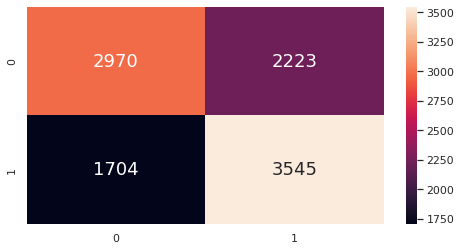

In [ ]:
from sklearn.metrics import confusion_matrix

# Plotting the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
f, axes = plt.subplots(1, 1, figsize=(8, 4))
sb.heatmap(confusion_matrix, annot = True, fmt=".0f", annot_kws={"size": 18})

TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0]
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
TNR = TN/(TN+FP)
FNR = FN/(TP+FN)


print("True Positive Rate:\t", TPR)
print("False Positive Rate:\t", FPR)
print("True Negative Rate:\t", TNR)
print("False Negative Rate:\t", FNR)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.57      0.60      5193
         1.0       0.61      0.68      0.64      5249

    accuracy                           0.62     10442
   macro avg       0.63      0.62      0.62     10442
weighted avg       0.62      0.62      0.62     10442



Another typical tool used with binary classifiers is the **receiver operating characteristic (ROC) curve**. The ROC curve of a simply random classifier is represented by the dotted line; a good classifier stays as far away from that line as feasible (toward the top-left corner).

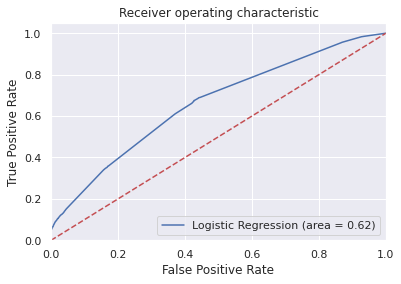

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### **INSIGHTS:**
Thus, our Logistic Regression model works with a **62% accuracy** on our test dataset. While this accuracy is not too impressive, it is not too useless either.  

*   From our exploratory data analysis (EDA), we had found substance abuse tendencies to be comparable among respondents with incomes across all categories. Consistently, this regression model **rejects income and poverty levels** as valid factors to indicate tendencies towards substance abuse.
*   The model **rejects the youngest age category (12-13 years old)** in its computations as this age category has a few to no substance abusers. This is consistent with our post-EDA derivations.
*   The model **rejects most of the race categories** in its computations, leading to the conclusion that ***race is not one of the top indicators*** to determine susceptibility to substance abuse. This is mostly consistent with what we concluded from our EDA, as abuse of 4 of the 8 individual substances considered, was equally prevalent among all races. 
*   The model also **rejects the K6 scores lower than 15**, clearly indicating that higher K6 scores, i.e., ***worse mental conditions and higher psychological distress indicate higher susceptibility to substance abuse***.

**Limitation**: Since logistic regression can only be used to predict a binary target variable (such as ILLYR), we will not be able to use this model for individual substance abuse analysis.

## **NAIVE BAYES CLASSIFIER**

In [ ]:
from sklearn.model_selection import train_test_split # For splitting the data into train and test samples
from sklearn.metrics import classification_report # For model evaluation metrics
from sklearn.preprocessing import OrdinalEncoder # For encoding categorical features from strings to number arrays
from sklearn.metrics import confusion_matrix, accuracy_score

import plotly.express as px  # For data visualization
import plotly.graph_objects as go # For data visualization

# Categorical Naive Bayes Classifier
from sklearn.naive_bayes import CategoricalNB

Since the Naive Bayes Classifier gives *inaccurate results with imbalanced data*, we will use the oversampling technique used in the logistic regression model as well, to balance our data (Synthetic Minority Oversampling Technique).

In [ ]:
data3.dropna(inplace = True)
X = data3.loc[:, data3.columns != 'ILLYR']
y = data3.loc[:, data3.columns == 'ILLYR']

from imblearn.over_sampling import SMOTE #Synthetic Minority Oversampling Technique

ob = SMOTE(random_state = 0) # Creating SMOTE object

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) #Splitting the dataset into train and test
columns = X_train.columns
ob_X, ob_y = ob.fit_resample(X_train, y_train)
ob_X = pd.DataFrame(data = ob_X, columns = columns)
ob_y = pd.DataFrame(data = ob_y, columns = ['ILLYR'])

print("Length of oversampled data is ", len(ob_X))
print("Number of non-drug abusers in oversampled data: ",len(ob_y[ob_y['ILLYR'] == 0]))
print("Number of drug abusers in oversampled data: ", len(ob_y[ob_y['ILLYR'] == 1]))
print("Proportion of non-drug abusers in oversampled data is ", len(ob_y[ob_y['ILLYR'] == 0])/len(ob_X))
print("Proportion of drug abusers in oversampled data is ", len(ob_y[ob_y['ILLYR'] == 1])/len(ob_X))

Length of oversampled data is  8846
Number of non-drug abusers in oversampled data:  4423
Number of drug abusers in oversampled data:  4423
Proportion of non-drug abusers in oversampled data is  0.5
Proportion of drug abusers in oversampled data is  0.5


We now construct a function to handle sample splitting, model fitting, and report printing.

In [ ]:
def mfunc(X, y, typ):
    
    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

    # Fit the model
    model = typ
    clf = model.fit(X_train, y_train)

    # Predict class labels on a test data
    pred_labels = model.predict(X_test)

    # Print model attributes 
    print('Classes: ', clf.classes_) # class labels known to the classifier
    if str(typ)=='GaussianNB()':
        print('Class Priors: ',clf.class_prior_) # prior probability of each class.
    else: 
        print('Class Log Priors: ',clf.class_log_prior_) # log prior probability of each class.
        
    # Use score method to get accuracy of the model
    print('--------------------------------------------------------')
    score = model.score(X_test, y_test)
    print('Accuracy Score: ', score)
    print('--------------------------------------------------------')
    
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels))
    
    # Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf, pred_labels

We will now implement the **Categorical Naive Bayes model** on our data as our data exclusively comprises categorical variables. Since our categorical variables are already encoded in numeric format, we will not need to encode them any further.

Classes:  [0. 1.]
Class Log Priors:  [-0.6957345  -0.69056653]
--------------------------------------------------------
Accuracy Score:  0.6360211002260738
--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.64      0.63      0.63      1335
         1.0       0.63      0.64      0.64      1319

    accuracy                           0.64      2654
   macro avg       0.64      0.64      0.64      2654
weighted avg       0.64      0.64      0.64      2654



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


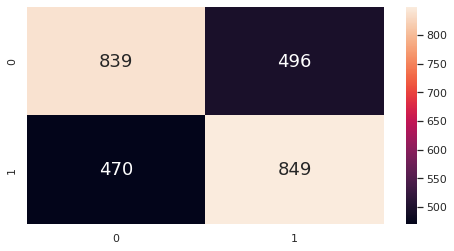

In [ ]:
# Select data for modeling
X = ob_X
y = ob_y

# Fit the model and print the result
X_train, X_test, y_train, y_test, clf, pred_labels = mfunc(X, y, CategoricalNB())

cm = confusion_matrix(y_test, pred_labels)
f, axes = plt.subplots(1, 1, figsize=(8, 4))
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

Utilising the four factors chosen earlier namely **age** (CATAG7), **race** (NEWRACE2), **income and poverty levels** (INCOME and POVERTY3, respectively) and **psychological distress** (K6SCYR), we have obtained a Naive Bayes Classifier model which predicts susceptibility to substance abuse with an accuracy of approximately **63.6%**.

As opposed to Logistic Regression, the **Categorical Naive Bayes Classifier can be used to predict a non-binary categorical variable**, i.e., a categorical variable with more than 2 levels. Therefore, we will now implement this model on the variable TYPE which has 8 categories indicating the 8 different types of illicit drugs we have studied in this project.

In [ ]:
data4 = data[['K6SCYR', 'INCOME', 'POVERTY3', 'CATAG7', 'NEWRACE2', 'TYPE']]
data4.dropna(inplace = True)
data4

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,K6SCYR,INCOME,POVERTY3,CATAG7,NEWRACE2,TYPE
1,17.0,3.0,3.0,7.0,1.0,None
11,17.0,1.0,2.0,5.0,1.0,None
14,5.0,4.0,3.0,6.0,1.0,None
15,3.0,1.0,2.0,7.0,1.0,None
16,21.0,2.0,3.0,6.0,1.0,Alcohol
...,...,...,...,...,...,...
32868,4.0,2.0,3.0,7.0,7.0,None
32880,19.0,2.0,2.0,5.0,2.0,None
32887,7.0,4.0,3.0,7.0,1.0,None
32889,14.0,4.0,3.0,6.0,1.0,None


Since the TYPE variable comprises string values, we will encode this column into numeric values ranging from 0 - 8.

In [ ]:
data4['TYPE'] = data4['TYPE'].mask(data4['TYPE'] == 'Hallucinogen', 1)
data4['TYPE'] = data4['TYPE'].mask(data4['TYPE'] == 'Sedatives', 2)
data4['TYPE'] = data4['TYPE'].mask(data4['TYPE'] == 'Stimulants', 3)
data4['TYPE'] = data4['TYPE'].mask(data4['TYPE'] == 'Pain Relievers', 4)
data4['TYPE'] = data4['TYPE'].mask(data4['TYPE'] == 'Alcohol', 5)
data4['TYPE'] = data4['TYPE'].mask(data4['TYPE'] == 'Heroin', 6)
data4['TYPE'] = data4['TYPE'].mask(data4['TYPE'] == 'Cocaine', 7)
data4['TYPE'] = data4['TYPE'].mask(data4['TYPE'] == 'Marijuana', 8)
data4['TYPE'] = data4['TYPE'].mask(data4['TYPE'] == 'None', 0)
data4['TYPE'] = data4['TYPE'].astype('int')
data4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,K6SCYR,INCOME,POVERTY3,CATAG7,NEWRACE2,TYPE
1,17.0,3.0,3.0,7.0,1.0,0
11,17.0,1.0,2.0,5.0,1.0,0
14,5.0,4.0,3.0,6.0,1.0,0
15,3.0,1.0,2.0,7.0,1.0,0
16,21.0,2.0,3.0,6.0,1.0,5
...,...,...,...,...,...,...
32868,4.0,2.0,3.0,7.0,7.0,0
32880,19.0,2.0,2.0,5.0,2.0,0
32887,7.0,4.0,3.0,7.0,1.0,0
32889,14.0,4.0,3.0,6.0,1.0,0


We will oversample the data again, as we did previously.

In [ ]:
X = data4.loc[:, data4.columns != 'TYPE']
y = data4.loc[:, data4.columns == 'TYPE']

from imblearn.over_sampling import SMOTE #Synthetic Minority Oversampling Technique

ob = SMOTE(k_neighbors = 1, random_state = 0) # Creating SMOTE object

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) #Splitting the dataset into train and test
columns = X_train.columns
ob_X, ob_y = ob.fit_resample(X_train, y_train)
ob_X = pd.DataFrame(data = ob_X, columns = columns)
ob_y = pd.DataFrame(data = ob_y, columns = ['TYPE'])

print("Length of oversampled data is ", len(ob_X))
print("Number of non-drug abusers in oversampled data: ",len(ob_y[ob_y['TYPE'] == 0]))
print("Number of drug abusers in oversampled data: ", len(ob_y[ob_y['TYPE'] == 1]))
print("Proportion of non-drug abusers in oversampled data is ", len(ob_y[ob_y['TYPE'] == 0])/len(ob_X))
print("Proportion of drug abusers in oversampled data is ", len(ob_y[ob_y['TYPE'] == 1])/len(ob_X))

Length of oversampled data is  57582
Number of non-drug abusers in oversampled data:  6398
Number of drug abusers in oversampled data:  6398
Proportion of non-drug abusers in oversampled data is  0.1111111111111111
Proportion of drug abusers in oversampled data is  0.1111111111111111


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classes:  [0 1 2 3 4 5 6 7 8]
Class Log Priors:  [-2.18956303 -2.20519533 -2.19422711 -2.18359814 -2.21333097 -2.20047993
 -2.20204926 -2.17854485 -2.20857714]
--------------------------------------------------------
Accuracy Score:  0.645904486251809
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.52      0.52      1885
           1       0.51      0.73      0.60      1955
           2       0.72      0.65      0.69      1906
           3       0.60      0.73      0.66      1858
           4       0.71      0.73      0.72      1991
           5       0.49      0.32      0.39      1934
           6       1.00      1.00      1.00      1941
           7       0.69      0.88      0.77      1835
           8       0.52      0.26      0.35      1970

    accuracy                           0.65     17275
   macro avg       0.64      0.65      0.63     17275
weighted avg       0.64      0.65      0.

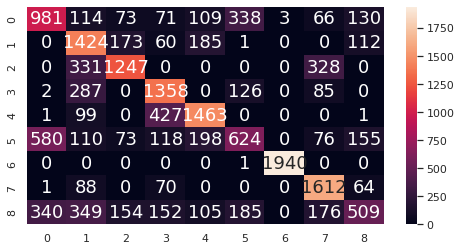

In [ ]:
# Select data for modeling
X = ob_X
y = ob_y

# Fit the model and print the result
X_train, X_test, y_train, y_test, clf, pred_labels = mfunc(X, y, CategoricalNB())

cm = confusion_matrix(y_test, pred_labels)
f, axes = plt.subplots(1, 1, figsize=(8, 4))
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

Thus, we have obtained a Naive Bayes Classifier model that can utilise the predicting factors **age** (CATAG7), **race** (NEWRACE2), **income and poverty levels** (INCOME and POVERTY3, respectively) and **psychological distress** (K6SCYR) to predict susceptibility to **specific types of substance abuse** upto an accuracy of **64.6%**.

In [ ]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(clf, X_test, y_test)
importances = imps.importances_mean
print(importances)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("The factors affecting susceptibility to substance abuse are as follows (from highest to lowest importance):")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, ['K6SCYR', 'INCOME', 'POVERTY', 'CATAG7', 'NEWRACE2'][indices[f]], importances[indices[f]]))

[0.31171056 0.19378292 0.13715774 0.15583213 0.06489146]
The factors affecting susceptibility to substance abuse are as follows (from highest to lowest importance):
1. K6SCYR (0.311711)
2. INCOME (0.193783)
3. CATAG7 (0.155832)
4. POVERTY (0.137158)
5. NEWRACE2 (0.064891)
